/tmp/ipykernel_1086855/4124442084.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(df, x = "seqlen", y = "mem_gib", hue="func", ci=None, hue_order=order)


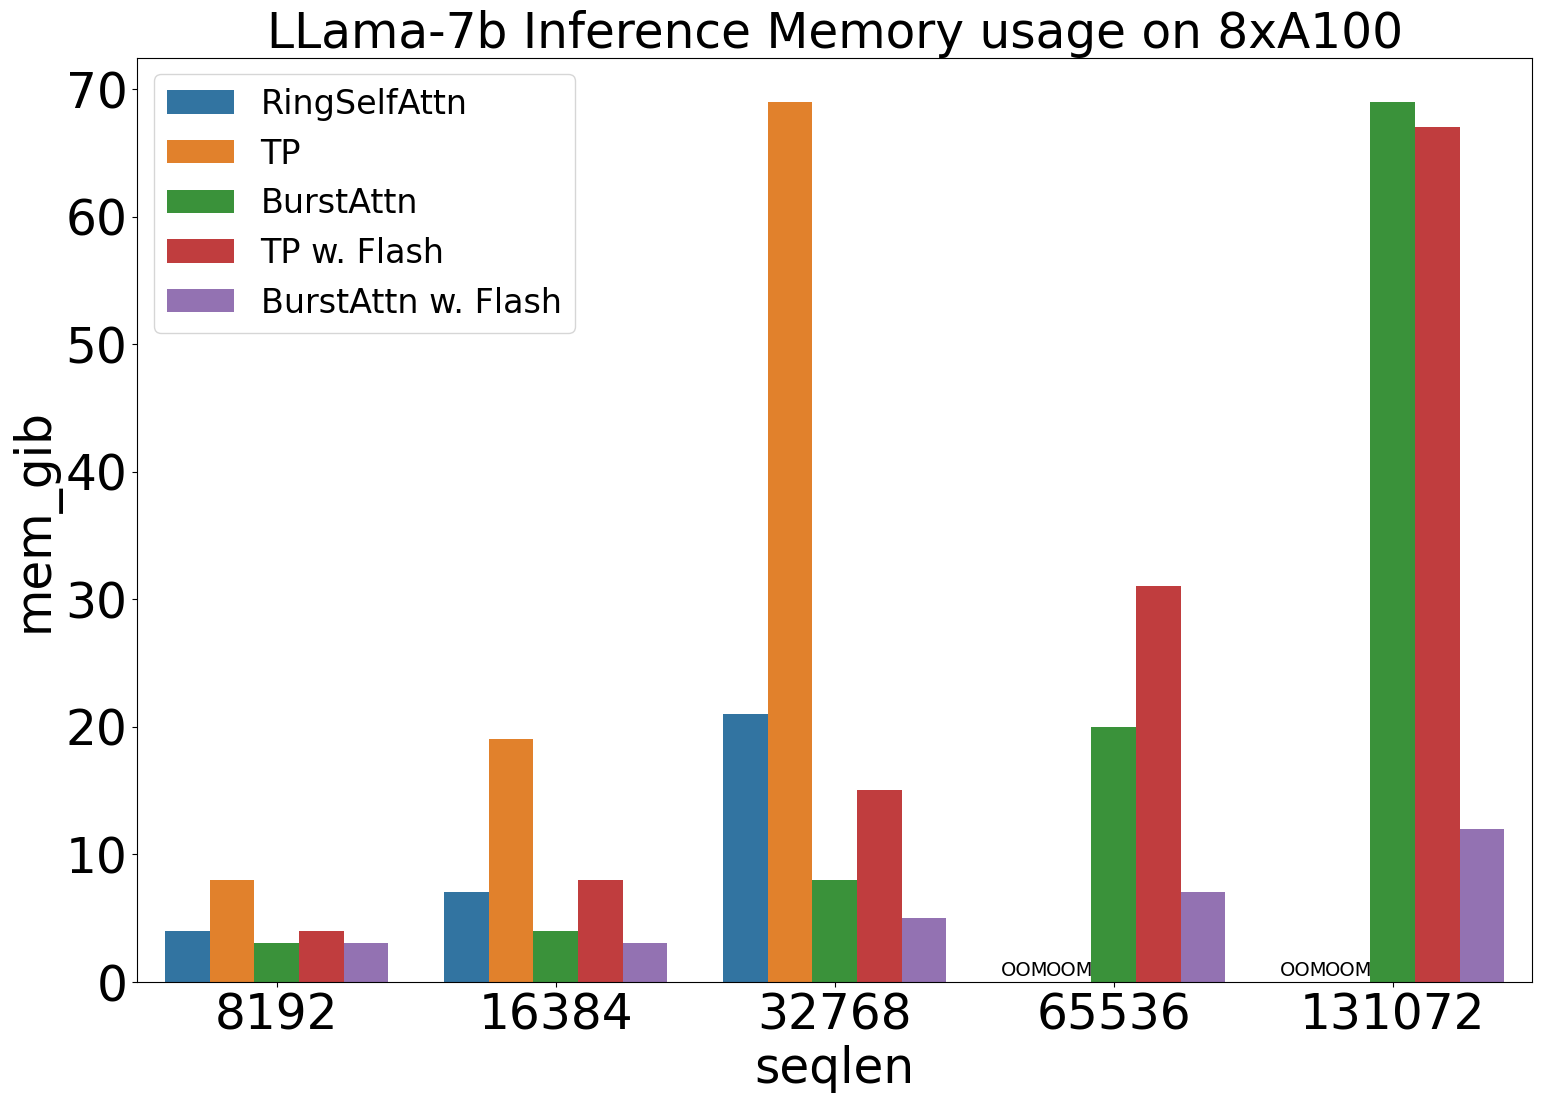

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


figsize = (18, 12)
fontsize=35
oom_fontsize=14
legend_fontsize=24
desc="Inference"
df = pd.read_csv("./Inference_exp.log")
df['mem_gib'] = df["mem"] // 1024
plt.figure(figsize=figsize)
plt.xlabel("Sequence length",fontsize=fontsize)
plt.ylabel("Memory(Gib)",fontsize=fontsize)
plt.title(f'LLama-7b {desc} Memory usage on 8xA100',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
order = ["ring","tp","burst","tp_flash","burst_flash"]
ax = sns.barplot(df, x = "seqlen", y = "mem_gib", hue="func", ci=None, hue_order=order)
plt.legend(["RingSelfAttn","TP","BurstAttn","TP w. Flash","BurstAttn w. Flash"], fontsize = legend_fontsize)
for i, bar in enumerate(ax.patches):
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width() / 2
    if np.isnan(y_value):
        ax.annotate('OOM', (x_value, 0), textcoords="offset points",
                    xytext=(0,4), ha='center', fontsize=oom_fontsize)

/tmp/ipykernel_1086855/1688545706.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(df, x = "seqlen", y = "time", hue="func", ci=None, hue_order=order)


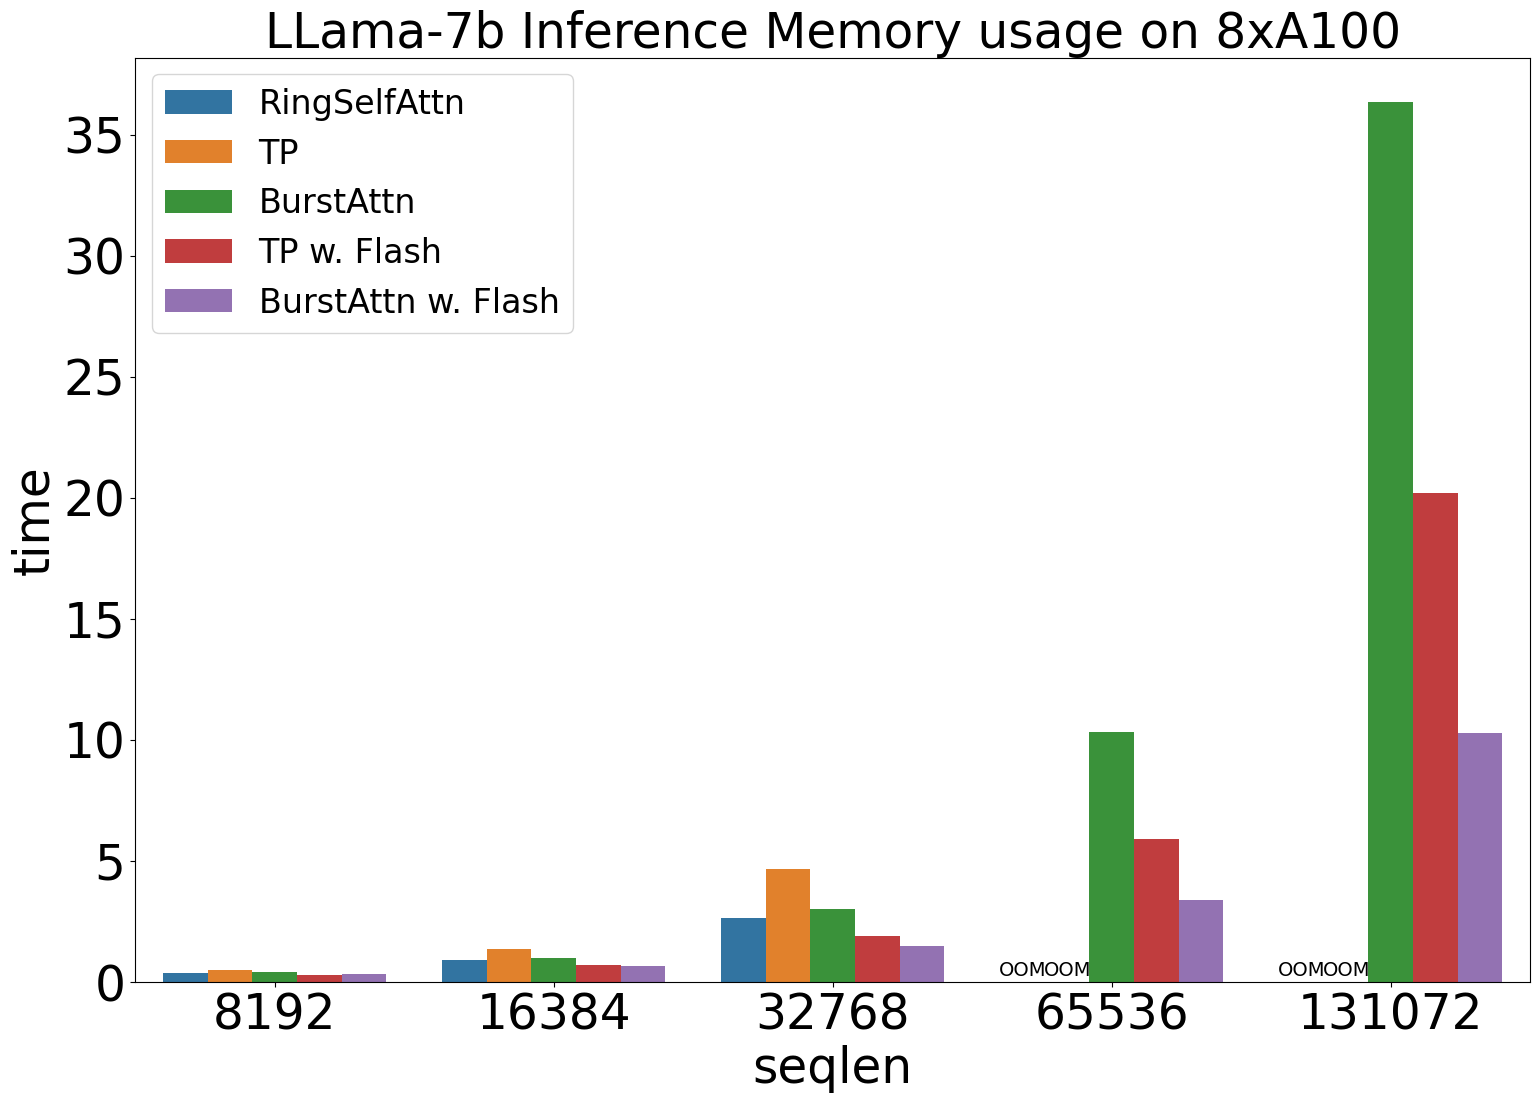

In [41]:
plt.figure(figsize=figsize)
plt.xlabel("Sequence length",fontsize=fontsize)
plt.ylabel("Memory(Gib)",fontsize=fontsize)
plt.title(f'LLama-7b {desc} Memory usage on 8xA100',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
order = ["ring","tp","burst","tp_flash","burst_flash"]
ax = sns.barplot(df, x = "seqlen", y = "time", hue="func", ci=None, hue_order=order)
plt.legend(["RingSelfAttn","TP","BurstAttn","TP w. Flash","BurstAttn w. Flash"], fontsize = legend_fontsize)
for i, bar in enumerate(ax.patches):
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width() / 2
    if np.isnan(y_value):
        ax.annotate('OOM', (x_value, 0), textcoords="offset points",
                    xytext=(0,4), ha='center', fontsize=oom_fontsize)

In [ ]:

def plot_bar(df,training=True, n_gpu=4):
    if training:
        desc = f"Traning"
    else:
        desc  = f"Inference"
    figsize = (18, 12)
    fontsize=35
    legend_fontsize=20

#    category_order = ['flash','burst_flash']
    category_order = ['ring','burst','burst_flash']
    # labels = ['dp w. standard', 'dp w. flash', 'sp w. standard', 'burst sp w/o flash','burst sp']
    # labels = ["Flash","Burst(LAO & GAO)"]
    # labels = ['Ring SelfAttention','Burst(LAO & GAO)']
    labels = ['Ring SelfAttention','Burst w/o LAO','Burst'] 
    df['func'] = pd.Categorical(df['func'], categories=category_order, ordered=True)
    plt.figure(figsize=figsize)
    df['mem_gib'] = df['mem_num']/1024
    df['toks']/=1000
    barplot = sns.barplot(data=df, x='s', y='mem_gib', hue='func',ci=None,palette='tab10')
    plt.title(f'LLama-7b {desc} Memory usage on {n_gpu}xA100',fontsize=fontsize)
    plt.legend(labels=labels,fontsize=legend_fontsize,loc="upper left")
    for p in barplot.patches:
    # get the height of the bar (which represents the data)
        height = p.get_height()
        # if the height is 0, add the text "oom"
        if height == 0:
            barplot.text(p.get_x() + p.get_width() / 2., height, 'OOM', ha='center', va='bottom',fontsize=legend_fontsize)
    plt.xlabel("Sequence length",fontsize=fontsize)
    plt.ylabel("Memory(Gib)",fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.savefig(f"llama_mem_{desc}_{n_gpu}gpu.png")
    plt.show()


    plt.figure(figsize=figsize)
    barplot = sns.barplot(data=df, x='s', y='toks', hue='func',ci=None,palette='tab10')
    plt.legend(labels=labels,fontsize=legend_fontsize,loc="upper right")
    plt.xlabel("Sequence length",fontsize=fontsize)
    plt.ylabel(f"Throughout(1k Token/s)",fontsize=fontsize)
    plt.title(f'LLama-7b {desc} Throughout on {n_gpu}xA100',fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    for p in barplot.patches:
    # get the height of the bar (which represents the data)
        height = p.get_height()
        # if the height is 0, add the text "oom"
        if height == 0:
            barplot.text(p.get_x() + p.get_width() / 2., height, 'OOM', ha='center', va='bottom',fontsize=legend_fontsize)
    plt.savefig(f"llama_speed_{desc}_{n_gpu}gpu.png")
    plt.show()
plot_bar(df_bert,n_gpu=n_gpu)
plot_bar(df_bert_inf,training=False,n_gpu=n_gpu)
# plot(df_bert[df_exp['backward'] == 1])